In [151]:
import numpy as np

import pandas as pd


In [165]:
df = pd.read_csv("cleaned_socio_economic_indicators_data.csv")
df.head()

,continent,region,country,year,country_code,fertility_rate,life_expectancy,infant_Mortality,GDP,population
0,Asia,South Asia,Afghanistan,1960,AFG,7.2820,32.5350,169.3731,537777811.1111,8622466.0000
1,Asia,South Asia,Afghanistan,1961,AFG,7.2840,33.0680,167.5793,548888895.5556,8790140.0000
2,Asia,South Asia,Afghanistan,1962,AFG,7.2920,33.5470,165.9882,546666677.7778,8969047.0000
3,Asia,South Asia,Afghanistan,1963,AFG,7.3020,34.0160,228.9000,751111191.1111,9157465.0000
4,Asia,South Asia,Afghanistan,1964,AFG,7.3040,34.4940,225.1000,800000044.4444,9355514.0000


# Calculate dollars per day per capita and add to the dataframe

In [166]:



# Calculate the 'Dollars_per_Day' variable and add it to the dataframe
df['Dollars_per_Day'] = df['GDP'] / df['population'] / 365


df.head()

# The 'Dollars_per_Day' variable represents the estimated amount
# of dollars per day per capita.


,continent,region,country,year,country_code,fertility_rate,life_expectancy,infant_Mortality,GDP,population,Dollars_per_Day
0,Asia,South Asia,Afghanistan,1960,AFG,7.2820,32.5350,169.3731,537777811.1111,8622466.0000,0.1709
1,Asia,South Asia,Afghanistan,1961,AFG,7.2840,33.0680,167.5793,548888895.5556,8790140.0000,0.1711
2,Asia,South Asia,Afghanistan,1962,AFG,7.2920,33.5470,165.9882,546666677.7778,8969047.0000,0.1670
3,Asia,South Asia,Afghanistan,1963,AFG,7.3020,34.0160,228.9000,751111191.1111,9157465.0000,0.2247
4,Asia,South Asia,Afghanistan,1964,AFG,7.3040,34.4940,225.1000,800000044.4444,9355514.0000,0.2343


## Standardization

In [167]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Selecting the indicator columns
Socio_economic_indicator_columns = df.columns[5:]

# Normalizing the indicator columns
scaler = StandardScaler()
df[Socio_economic_indicator_columns] = scaler.fit_transform(df[Socio_economic_indicator_columns])


df.head()

,continent,region,country,year,country_code,fertility_rate,life_expectancy,infant_Mortality,GDP,population,Dollars_per_Day
0,Asia,South Asia,Afghanistan,1960,AFG,1.7401,-2.9253,2.6661,-0.1909,-0.1576,-0.2090
1,Asia,South Asia,Afghanistan,1961,AFG,1.7411,-2.8769,2.6262,-0.1909,-0.1560,-0.2090
2,Asia,South Asia,Afghanistan,1962,AFG,1.7452,-2.8334,2.5908,-0.1909,-0.1543,-0.2090
3,Asia,South Asia,Afghanistan,1963,AFG,1.7504,-2.7908,3.9902,-0.1907,-0.1525,-0.2090
4,Asia,South Asia,Afghanistan,1964,AFG,1.7514,-2.7473,3.9057,-0.1906,-0.1506,-0.2090


## Perform PCA

Apply Principal Component Analysis (PCA) to the standardized socio-economic indicators using scikit-learn and  let the algorithm determine the optimal number of components based on the explained variance.

In [168]:

from sklearn.decomposition import PCA

# Perform PCA to determine optimal number of components
pca = PCA()
pca.fit(df[Socio_economic_indicator_columns])

# Determine the optimal number of components based on explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance >= 0.95) + 1

# Apply PCA with the optimal number of components
pca = PCA(n_components=n_components)
pca_components = pca.fit_transform(df[Socio_economic_indicator_columns])

# Add the PCA components to the original dataframe
df_pca = pd.DataFrame(pca_components, columns=[f"PC{i+1}" for i in range(n_components)])
df_final = pd.concat([df, df_pca], axis=1)



df_final.head()




,continent,region,country,year,country_code,fertility_rate,life_expectancy,infant_Mortality,GDP,population,Dollars_per_Day,PC1,PC2,PC3,PC4
0,Asia,South Asia,Afghanistan,1960,AFG,1.7401,-2.9253,2.6661,-0.1909,-0.1576,-0.2090,-4.2259,0.4776,-0.1507,0.2088
1,Asia,South Asia,Afghanistan,1961,AFG,1.7411,-2.8769,2.6262,-0.1909,-0.1560,-0.2090,-4.1756,0.4694,-0.1509,0.2065
2,Asia,South Asia,Afghanistan,1962,AFG,1.7452,-2.8334,2.5908,-0.1909,-0.1543,-0.2090,-4.1323,0.4624,-0.1511,0.2045
3,Asia,South Asia,Afghanistan,1963,AFG,1.7504,-2.7908,3.9902,-0.1907,-0.1525,-0.2090,-4.9129,0.6354,-0.1499,0.2384
4,Asia,South Asia,Afghanistan,1964,AFG,1.7514,-2.7473,3.9057,-0.1906,-0.1506,-0.2090,-4.8398,0.6224,-0.1502,0.2349


## Interpret Principal Components

# Explained variance ratios

In [169]:

# Access the explained variance ratio of each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Loop through the explained variance ratio and print the contribution of each component

print("Explained Variance Ratios:")
for i, ratio in enumerate(explained_variance_ratios):
    print(f"Explained Variance Ratios PC{i+1} = {ratio}")

Explained Variance Ratios:
Explained Variance Ratios PC1 = 0.4669726898915018
Explained Variance Ratios PC2 = 0.22799490231662484
Explained Variance Ratios PC3 = 0.16587773312925036
Explained Variance Ratios PC4 = 0.09948096787004257


# Visualize the explained variance ratio

Explained Variance Ratios:
Explained Variance Ratio PC1 = 0.4669726898915018
Explained Variance Ratio PC2 = 0.22799490231662484
Explained Variance Ratio PC3 = 0.16587773312925036
Explained Variance Ratio PC4 = 0.09948096787004257


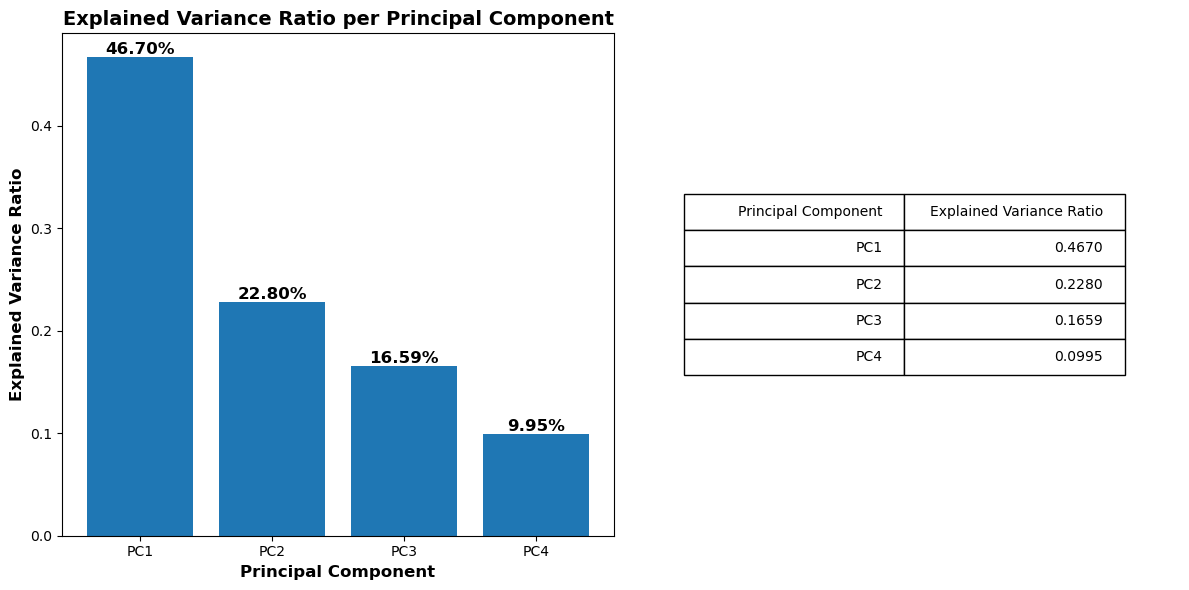

In [170]:
import matplotlib.pyplot as plt
import numpy as np

# Access the explained variance ratio of each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Loop through the explained variance ratio and print the contribution of each component
print("Explained Variance Ratios:")
for i, ratio in enumerate(explained_variance_ratios):
    print(f"Explained Variance Ratio PC{i+1} = {ratio}")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the explained variance ratios as a bar plot
x = np.arange(len(explained_variance_ratios)) + 1
bars = ax1.bar(x, explained_variance_ratios)
ax1.set_xticks(x)
ax1.set_xticklabels([f'PC{i+1}' for i in range(len(explained_variance_ratios))])
ax1.set_xlabel('Principal Component', fontsize=12, fontweight='bold')
ax1.set_ylabel('Explained Variance Ratio', fontsize=12, fontweight='bold')
ax1.set_title('Explained Variance Ratio per Principal Component', fontsize=14, fontweight='bold')

# Add the percentage of explained variance ratios on top of the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{explained_variance_ratios[i]*100:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Create a table with the explained variance ratios
table_data = [['Principal Component', 'Explained Variance Ratio']]
for i, ratio in enumerate(explained_variance_ratios):
    table_data.append([f'PC{i+1}', f'{ratio:.4f}'])

# Create the table
ax2.axis('off')
table = ax2.table(cellText=table_data, loc='center', colWidths=[0.4, 0.4])
table.set_fontsize(14)
# Adjust the table font size
table.auto_set_font_size(False)
table.set_fontsize(10)

table.scale(1, 2)



# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

# Cumulative Explained variance ratio

In [158]:
cumulative_explained_variance_ratios = np.cumsum(explained_variance_ratios)

print("Cumulative Explained Variance Ratios:")
for i, ratio in enumerate(cumulative_explained_variance_ratios):
    print(f"Cumulative Explained Variance Ratios PC{i+1} = {ratio}")

Cumulative Explained Variance Ratios:
Cumulative Explained Variance Ratios PC1 = 0.466972689891501
Cumulative Explained Variance Ratios PC2 = 0.6949675922081258
Cumulative Explained Variance Ratios PC3 = 0.8608453253373767
Cumulative Explained Variance Ratios PC4 = 0.9603262932074206


## Visualize the cumulative explained variance ratios

Cumulative Explained Variance Ratios:
Cumulative Explained Variance Ratio PC1 = 0.4670
Cumulative Explained Variance Ratio PC2 = 0.6950
Cumulative Explained Variance Ratio PC3 = 0.8608
Cumulative Explained Variance Ratio PC4 = 0.9603


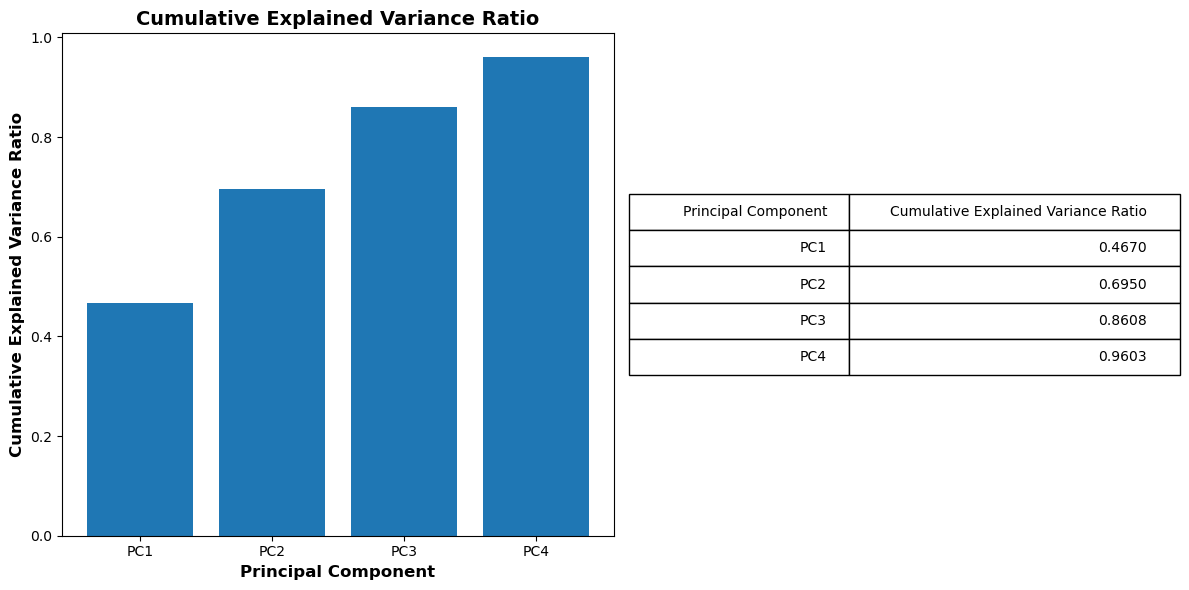

In [159]:
import matplotlib.pyplot as plt
import numpy as np

# Acess the cumulative explained variance ratios
cumulative_explained_variance_ratios = np.cumsum(explained_variance_ratios)

# Print the cumulative explained variance ratios
print("Cumulative Explained Variance Ratios:")
for i, ratio in enumerate(cumulative_explained_variance_ratios):
    print(f"Cumulative Explained Variance Ratio PC{i+1} = {ratio:.4f}")

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the cumulative explained variance ratios as a bar plot
x = np.arange(len(cumulative_explained_variance_ratios)) + 1
ax1.bar(x, cumulative_explained_variance_ratios)
ax1.set_xticks(x)
ax1.set_xticklabels([f'PC{i+1}' for i in range(len(cumulative_explained_variance_ratios))])
ax1.set_xlabel('Principal Component', fontsize=12, fontweight='bold')
ax1.set_ylabel('Cumulative Explained Variance Ratio', fontsize=12, fontweight='bold')
ax1.set_title('Cumulative Explained Variance Ratio', fontsize=14, fontweight='bold')

# Create a table with the cumulative explained variance ratios
table_data = [['Principal Component', 'Cumulative Explained Variance Ratio']]
for i, ratio in enumerate(cumulative_explained_variance_ratios):
    table_data.append([f'PC{i+1}', f'{ratio:.4f}'])

# Create the table
ax2.axis('off')
table = ax2.table(cellText=table_data, loc='center', colWidths=[0.4, 0.6])

# Adjust the table font size
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

## Principal component Loadings

In [171]:


# Access the principal component loadings
principal_component_loadings = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)])

# Combine the socio-economic indicators and principal component loadings into a single DataFrame
combined_df = pd.concat([pd.Series(Socio_economic_indicator_columns, name='Socio-Economic Indicators'), principal_component_loadings], axis=1)

print("Principal Component Loadings:")
print(combined_df.to_string(index=False))



Principal Component Loadings:
Socio-Economic Indicators     PC1     PC2     PC3     PC4
           fertility_rate -0.5556  0.0519  0.0369  0.0822
          life_expectancy  0.5775 -0.0907 -0.0082 -0.0053
         infant_Mortality -0.5734  0.1252  0.0008  0.0248
                      GDP  0.1552  0.6676  0.1306  0.7157
               population  0.0695  0.7139  0.0603 -0.6908
          Dollars_per_Day  0.0013 -0.1344  0.9889 -0.0555


# Visualization the principal component Loadings

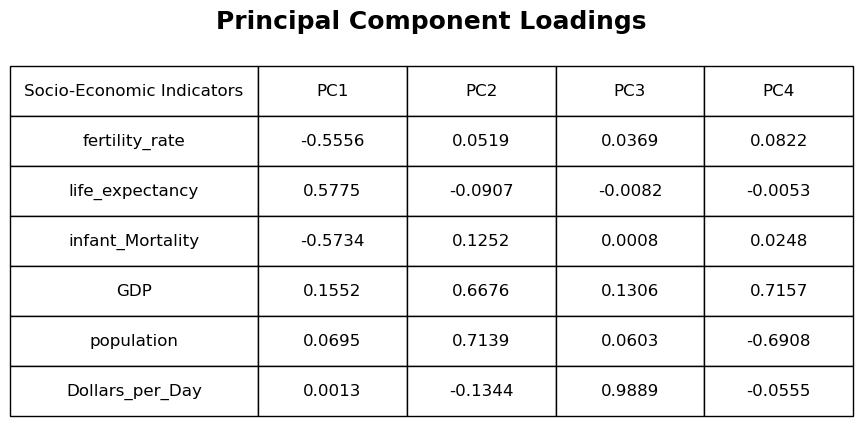

In [172]:

# Access the principal component loadings
principal_component_loadings = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)])

# Combine the socio-economic indicators and principal component loadings into a single DataFrame
combined_df = pd.concat([pd.Series(Socio_economic_indicator_columns, name='Socio-Economic Indicators'), principal_component_loadings], axis=1)

# Create a table with the principal component loadings
table_data = [['Socio-Economic Indicators'] + ['PC{}'.format(i+1) for i in range(pca.n_components_)]]
for row in combined_df.itertuples(index=False):
    formatted_row = []
    for val in row:
        if isinstance(val, str):
            formatted_row.append(val)
        else:
            formatted_row.append(f'{val:.4f}')
    table_data.append(formatted_row)

# Create the figure and axes
fig, ax = plt.subplots()

# Create the table
table = ax.table(cellText=table_data, loc='center', colWidths=[0.5] + [0.3] * pca.n_components_, cellLoc='center', rowLoc='center', colLoc='center', )
table.auto_set_font_size(False)
table.set_fontsize(12)
table_title = ax.set_title('Principal Component Loadings', fontsize=18, fontweight='bold', pad=20)
table_values = ax.set_ylabel('Socio-Economic Indicators', fontsize=14, fontweight='bold', labelpad=10)
table_values = ax.set_xlabel('Principal Components', fontsize=18, fontweight='bold', labelpad=10)
table.scale(1, 3)

# Remove the axis
ax.axis('off')

# Show the table
plt.show()

## Scree plot

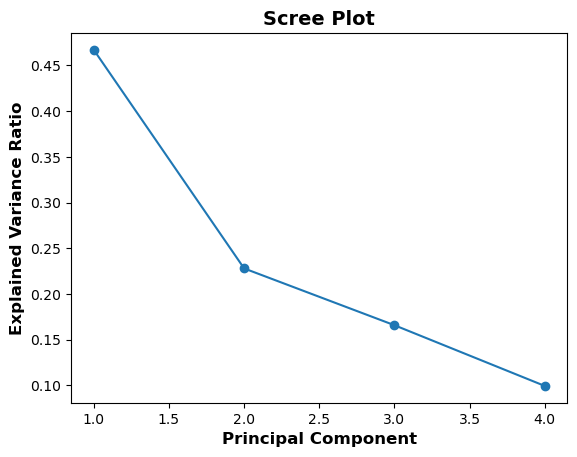

In [173]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, marker='o')
plt.xlabel('Principal Component', fontsize=12, fontweight='bold')
plt.ylabel('Explained Variance Ratio', fontsize=12, fontweight='bold')
plt.title('Scree Plot', fontsize=14, fontweight='bold')
plt.show()

## creating Socio economic trend variable

In [174]:
import pandas as pd

# Select the retained principal components
retained_components = ['PC1', 'PC2']

# Calculate the weights based on explained variance ratios
explained_variance_ratios = [0.46697268989149937, 0.22799490231662492]
total_variance = sum(explained_variance_ratios)
weights = [ratio / total_variance for ratio in explained_variance_ratios]

# Calculate the socio-economic trend variable
df_final['socio_economic_trend'] = df_final[retained_components].dot(weights)

# Drop the unretained principal components from the dataframe
df_final.drop(['PC3', 'PC4'], axis=1, inplace=True)


df_final.head()

,continent,region,country,year,country_code,fertility_rate,life_expectancy,infant_Mortality,GDP,population,Dollars_per_Day,PC1,PC2,socio_economic_trend
0,Asia,South Asia,Afghanistan,1960,AFG,1.7401,-2.9253,2.6661,-0.1909,-0.1576,-0.2090,-4.2259,0.4776,-2.6829
1,Asia,South Asia,Afghanistan,1961,AFG,1.7411,-2.8769,2.6262,-0.1909,-0.1560,-0.2090,-4.1756,0.4694,-2.6517
2,Asia,South Asia,Afghanistan,1962,AFG,1.7452,-2.8334,2.5908,-0.1909,-0.1543,-0.2090,-4.1323,0.4624,-2.6249
3,Asia,South Asia,Afghanistan,1963,AFG,1.7504,-2.7908,3.9902,-0.1907,-0.1525,-0.2090,-4.9129,0.6354,-3.0927
4,Asia,South Asia,Afghanistan,1964,AFG,1.7514,-2.7473,3.9057,-0.1906,-0.1506,-0.2090,-4.8398,0.6224,-3.0478


## Comparative Analysis

In [175]:
import pandas as pd



# Group the data by the desired geographical or demographic factor (i.e., 'continent') and calculate the average values of the numeric columns for each group
grouped_data = df_final.groupby('continent').mean(numeric_only=True)  # you can Change 'continent'  to the desired factor

# Create a new DataFrame with the average value and continent columns
comparative_table = pd.DataFrame({'Continent': grouped_data.index, 'Average Value': grouped_data['socio_economic_trend']})

# Display the table
print(comparative_table)

          Continent  Average Value
continent                         
Africa       Africa        -1.0850
Americas   Americas         0.3256
Asia           Asia         0.0950
Europe       Europe         0.8671
Oceania     Oceania        -0.0537


## Visualize the comparative Analysis on a bar chart and table

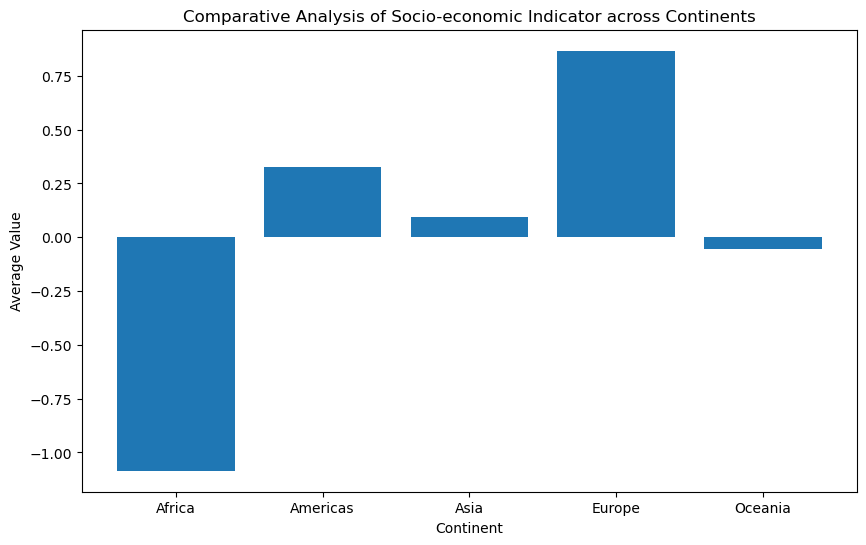

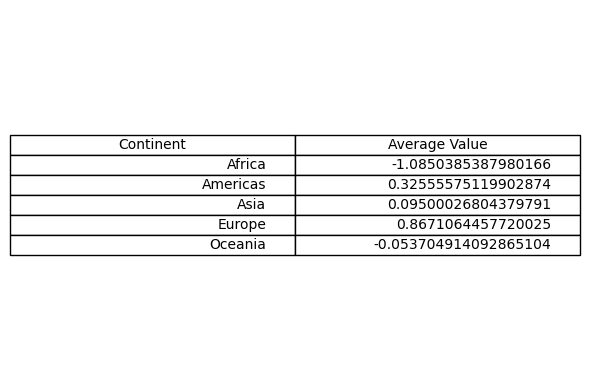

In [176]:

import matplotlib.pyplot as plt


# Group the data by the desired geographical or demographic factor
grouped_data = df_final.groupby('continent').mean(numeric_only=True)  

# Create a new DataFrame with the average value and continent columns
comparative_table = pd.DataFrame({'Continent': grouped_data.index, 'Average Value': grouped_data['socio_economic_trend']})  # Replace 'socio_economic_indicator' with the desired socio-economic indicator

# Plot the average values
plt.figure(figsize=(10, 6))
plt.bar(comparative_table['Continent'], comparative_table['Average Value'])
plt.xlabel('Continent')
plt.ylabel('Average Value')
plt.title('Comparative Analysis of Socio-economic Indicator across Continents')

# Display the table
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')
ax.table(cellText=comparative_table.values, colLabels=comparative_table.columns, loc='center')

# Show the plot and table side by side
plt.tight_layout()
plt.show()

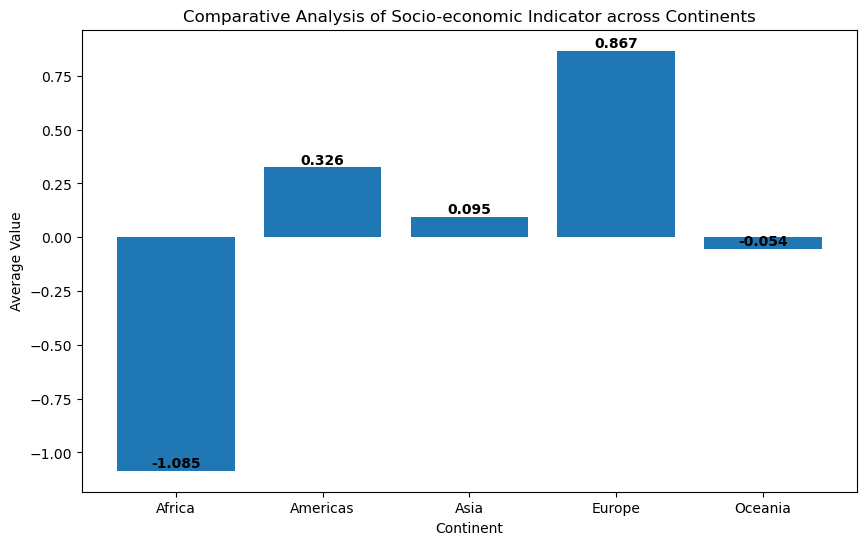

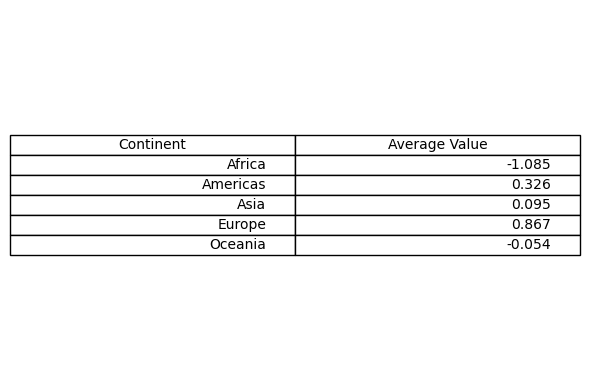

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Group the data by the desired geographical 
grouped_data = df_final.groupby('continent').mean(numeric_only=True)  

# Create a new DataFrame with the average value and continent columns
comparative_table = pd.DataFrame({'Continent': grouped_data.index, 'Average Value': grouped_data['socio_economic_trend']})  # Replace 'socio_economic_indicator' with the desired socio-economic indicator

# Round average values to 3 decimal places
comparative_table['Average Value'] = comparative_table['Average Value'].round(3)

# Plot the average values
plt.figure(figsize=(10, 6))
plt.bar(comparative_table['Continent'], comparative_table['Average Value'])
plt.xlabel('Continent')
plt.ylabel('Average Value')
plt.title('Comparative Analysis of Socio-economic Indicator across Continents')

# Add average values as text on top of the bars
for i, value in enumerate(comparative_table['Average Value']):
    plt.text(i, value, str(value), ha='center', va='bottom', fontweight='bold')

# Display the table
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')
ax.table(cellText=comparative_table.values, colLabels=comparative_table.columns, loc='center')

# Show the plot and table side by side
plt.tight_layout()
plt.show()

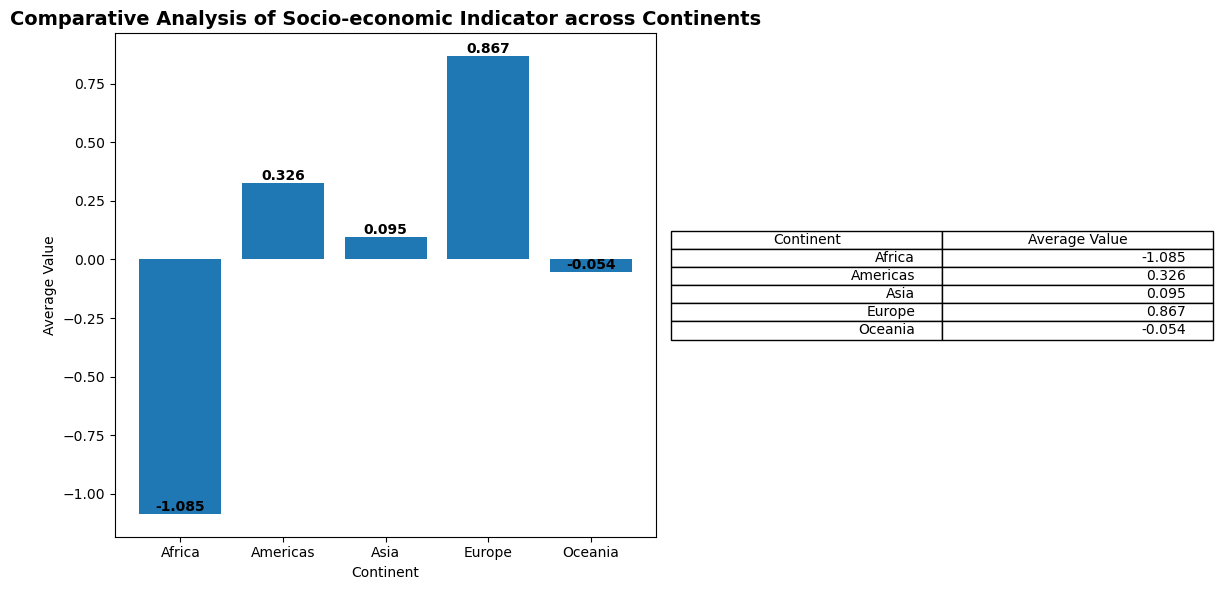

In [178]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by the desired geographical 
grouped_data = df_final.groupby('continent').mean(numeric_only=True)  

# Create a new DataFrame with the average value and continent columns
comparative_table = pd.DataFrame({'Continent': grouped_data.index, 'Average Value': grouped_data['socio_economic_trend']})  # Replace 'socio_economic_indicator' with the desired socio-economic indicator

# Round average values to 3 decimal places
comparative_table['Average Value'] = comparative_table['Average Value'].round(3)

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the average values
ax1.bar(comparative_table['Continent'], comparative_table['Average Value'])
ax1.set_xlabel('Continent')
ax1.set_ylabel('Average Value')
ax1.set_title('Comparative Analysis of Socio-economic Indicator across Continents', fontsize=14, fontweight='bold')

# Add average values as text on top of the bars
for i, value in enumerate(comparative_table['Average Value']):
    ax1.text(i, value, str(value), ha='center', va='bottom', fontweight='bold')

# Display the table
ax2.axis('off')
ax2.table(cellText=comparative_table.values, colLabels=comparative_table.columns, loc='center')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot and table side by side
plt.show()

## correlation

In [181]:
# select the columns
Socio_economic_indicator_columns = df_final.columns[5:]

# calculate the correlation matrix
correlation_matrix = df_final[Socio_economic_indicator_columns].corr().round(2)





# Visualize the correlations using a heatmap:

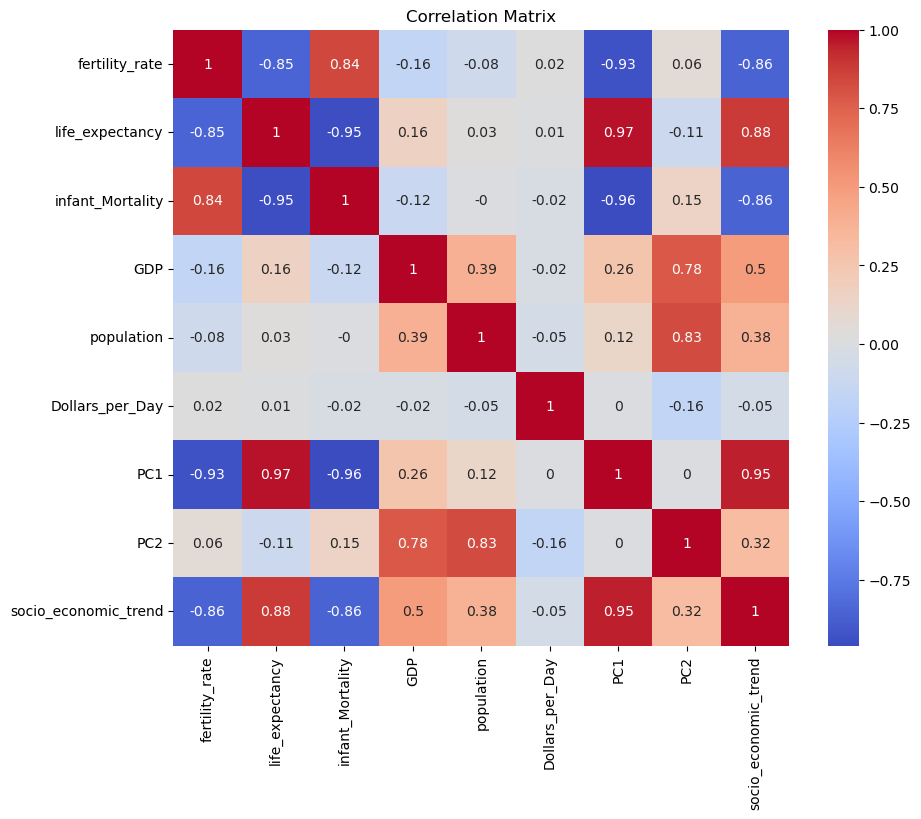

In [182]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

#  Identify variables with significant impact on the socio-economic trend:

In [149]:
correlation_with_trend = correlation_matrix['socio_economic_trend'].sort_values(ascending=False)
significant_variables = correlation_with_trend[abs(correlation_with_trend) > 0.5].index.tolist()
   
significant_variables
   

['socio_economic_trend',
 'PC1',
 'life_expectancy',
 'fertility_rate',
 'infant_Mortality']